In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import csv

Populating the interactive namespace from numpy and matplotlib


In [4]:
job_data = pd.read_csv('Train_rev1.csv')

In [5]:
job_data.head()

Id                                              Title  \
0  12612628                        Engineering Systems Analyst   
1  12612830                            Stress Engineer Glasgow   
2  12612844                   Modelling and simulation analyst   
3  12613049  Engineering Systems Analyst / Mathematical Mod...   
4  12613647         Pioneer, Miser Engineering Systems Analyst   

                                     FullDescription  \
0  Engineering Systems Analyst Dorking Surrey Sal...   
1  Stress Engineer Glasgow Salary **** to **** We...   
2  Mathematical Modeller / Simulation Analyst / O...   
3  Engineering Systems Analyst / Mathematical Mod...   
4  Pioneer, Miser  Engineering Systems Analyst Do...   

                         LocationRaw LocationNormalized ContractType  \
0            Dorking, Surrey, Surrey            Dorking          NaN   
1        Glasgow, Scotland, Scotland            Glasgow          NaN   
2  Hampshire, South East, South East          Hampshire          NaN   
3     Surrey, South East, South East             Surrey          NaN   
4     Surrey, South East, South East             Surrey          NaN   

  ContractTime                       Company          Category  \
0    permanent  Gregory Martin International  Engineering Jobs   
1    permanent  Gregory Martin International  Engineering Jobs   
2    permanent  Gregory Martin International  Engineering Jobs   
3    permanent  Gregory Martin International  Engineering Jobs   
4    permanent  Gregory Martin International  Engineering Jobs   

                                SalaryRaw  SalaryNormalized        SourceName  
0              20000 - 30000/annum 20-30K             25000  cv-library.co.uk  
1              25000 - 35000/annum 25-35K             30000  cv-library.co.uk  
2              20000 - 40000/annum 20-40K             30000  cv-library.co.uk  
3  25000 - 30000/annum 25K-30K negotiable             27500  cv-library.co.uk  
4              20000 - 30000/annum 20-30K             25000  cv-library.co.uk

# Taking random 2500 data points

In [8]:
import random
job_data = job_data.sample(n=2500, random_state = 99)

In [9]:
len(job_data)

2500

A1. What are the top 5 parts of speech in the job descriptions? How frequently do they appear? How do these numbers change if you exclude stopwords? 

In [11]:
job_data['FullDescription']

6593      VanRath IT are currently recruiting a successf...
89169     My client is currently looking to recruit an e...
107906    Are you a motivated, sales focused individual,...
173867    FED UP OF MINIMUM WAGE? WORKING HARD BUT GOING...
85319     A number of great career opportunities have ar...
1570      Bluebird Care are a quality home care provider...
31245     Highly sought after consultancy seeks talented...
121870    Change Management Specialist Salary: ****  ***...
132217    Intermediate Electrical Engineer Our client sp...
88305     SUMMIT Decommisioning Analyst Banking London *...
209822    We are currently seeking an Estimator to work ...
194287    Anchor is England’s largest nonforprofit provi...
130157    Assistant Accountant ****  **** per annum depe...
122482    Traffic Marshall required for a busy construct...
46386     A leading global bank has an exciting opportun...
76070     Learner Recruitment Consultant / Business Deve...
55894     Birmingham  this specialist Ac

In [85]:
# Make corpus:

job_data_list = job_data["FullDescription"].tolist()

In [86]:
from nltk.tokenize import sent_tokenize, word_tokenize

tokenized_words = []
for item in job_data_list:
    words = []
    words = word_tokenize(item.lower())
    #words.append(words)
    tokenized_words = tokenized_words + words

In [87]:
tokenized_words

['vanrath',
 'it',
 'are',
 'currently',
 'recruiting',
 'a',
 'successful',
 'support',
 'analyst',
 'for',
 'their',
 'client',
 'based',
 'in',
 'belfast',
 'city',
 'centre',
 '.',
 'the',
 'client',
 'is',
 'becoming',
 'well',
 'established',
 'within',
 'the',
 'northern',
 'ireland',
 'market',
 'place',
 'as',
 'a',
 'company',
 'that',
 'promotes',
 'a',
 'work',
 'life',
 'balance',
 'and',
 'career',
 'progression',
 '.',
 'the',
 'client',
 'has',
 'a',
 'number',
 'of',
 'key',
 'products',
 'that',
 'are',
 'market',
 'leading',
 'and',
 'has',
 'resulted',
 'in',
 'them',
 'attracting',
 'a',
 'number',
 'of',
 'key',
 'clients',
 '.',
 'this',
 'role',
 'has',
 'been',
 'created',
 'through',
 'a',
 'well',
 'thought',
 'out',
 'structured',
 'growth',
 'plan',
 '.',
 'the',
 'client',
 'is',
 'currently',
 'building',
 'a',
 'number',
 'of',
 'applications',
 'for',
 'ipad',
 "'s",
 'and',
 'android',
 'phones',
 '.',
 'responsibilities',
 ':',
 'logging',
 'and',
 'i

In [54]:
tokenized_words_string = " ".join(str(x) for x in tokenized_words)
from string import punctuation
for p in punctuation:
    tokenized_words_string=tokenized_words_string.replace(p,'')

'vanrath it are currently recruiting a successful support analyst for their client based in belfast city centre  the client is becoming well established within the northern ireland market place as a company that promotes a work life balance and career progression  the client has a number of key products that are market leading and has resulted in them attracting a number of key clients  this role has been created through a well thought out structured growth plan  the client is currently building a number of applications for ipad s and android phones  responsibilities  logging and investigating client support issues and requests guiding and implementing setup process for new clients training and educating new and existing clients on site setup creating release documentation and user guides managing and maintaining irp knowledge base experience  experience of database use  preferably sql server  experience of working in customer service in an it environment experience of using and suppor

In [34]:
# POS Tagging
import nltk

job_descriptions_tagged = nltk.pos_tag(word_tokenize(tokenized_words_string))

In [36]:
# Find the frequency of tags
tag_fd = nltk.FreqDist(tag for (word, tag) in job_descriptions_tagged)
tag_fd.most_common()[:5]

[('NN', 319015),
 ('JJ', 141601),
 ('IN', 131151),
 ('DT', 101956),
 ('NNS', 101616)]

The most common parts of speech without removing stop words are nouns, adjective, preposition, Determiner, and Noun plural

In [84]:
# Remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

word_tokenize = word_tokenize(tokenized_words_string)
filtered_sentence = [w for w in word_tokenize if not w in stop_words]

TypeError: 'list' object is not callable

In [53]:
tokenized_words_without_stopwords = " ".join(str(x) for x in filtered_sentence)

job_descriptions_tagged_without_stopwords = nltk.pos_tag(nltk.word_tokenize(tokenized_words_without_stopwords))
tag_fd = nltk.FreqDist(tag for (word, tag) in job_descriptions_tagged_without_stopwords)
tag_fd.most_common()[:5]

[('NN', 306581),
 ('JJ', 146933),
 ('NNS', 100440),
 ('VBG', 52074),
 ('VBP', 34270)]

The top most frequent POS are now noun, adjective, plural noun, verb and verb - singular present

A2. Does this data support Zipf’s law? Plot the most common 100 words in the data against the theoretical prediction of the law. For this question, do not remove stopwords. Also do not perform stemming or lemmatization. 

In [59]:
all_words = nltk.FreqDist((nltk.word_tokenize(tokenized_words_string)))


[('and', 53674), ('the', 42430), ('to', 40892), ('a', 30818), ('of', 28844), ('in', 20858), ('for', 17536), ('with', 14958), ('you', 14080), ('will', 13346), ('be', 12574), ('is', 12442), ('this', 9920), ('as', 9312), ('an', 9012)]


In [70]:
#Plot top 100 words and their rank
topwords = all_words.most_common(100)
frequency = []
for (word, freq) in topwords:
    frequency.append(freq)

frequency = pd.Series(frequency)

In [74]:
# Get the observational rank
word_ranking = frequency.rank(method = 'min',ascending =False)

0       1.0
1       2.0
2       3.0
3       4.0
4       5.0
5       6.0
6       7.0
7       8.0
8       9.0
9      10.0
10     11.0
11     12.0
12     13.0
13     14.0
14     15.0
15     16.0
16     17.0
17     18.0
18     19.0
19     20.0
20     21.0
21     22.0
22     23.0
23     24.0
24     25.0
25     26.0
26     27.0
27     28.0
28     29.0
29     30.0
      ...  
70     71.0
71     72.0
72     73.0
73     74.0
74     74.0
75     76.0
76     77.0
77     78.0
78     78.0
79     80.0
80     81.0
81     82.0
82     83.0
83     84.0
84     85.0
85     86.0
86     87.0
87     88.0
88     89.0
89     90.0
90     91.0
91     92.0
92     93.0
93     94.0
94     95.0
95     96.0
96     97.0
97     98.0
98     99.0
99    100.0
Length: 100, dtype: float64

Text(0,0.5,'Word Frequency')

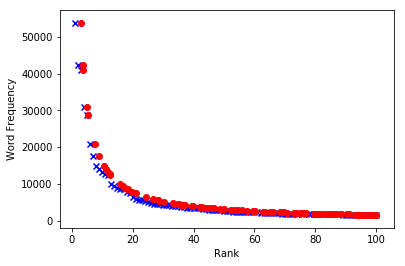

In [83]:
# Plot obseravtional and theoritical rank
from matplotlib import pyplot as plt
import math

def theoretical_rank(freq):
    # We will take the frequency of the words to calculate the theoritical rank using variation of Zipf's Law
    rank = math.exp((-1)*(np.log(freq) - np.log(max(word_ranking)*min(frequency))))
    return rank

# get the theoretical ranks for the frequencies observed
theoretical_rank = frequency.map(theoretical_rank)
plt.scatter(word_ranking,frequency,color = 'blue', marker = 'x',label = 'Frequency vs observed rank')
plt.scatter(theoretical_rank,frequency,color = 'red',marker = 'o',label = 'Frequency vs theoritical rank')
plt.xlabel('Rank')
plt.ylabel('Word Frequency')


A3. If we remove stopwords and lemmatize the data, what are the 10 most common words? What are their frequencies?